## 피마 인디언 당뇨병 예측

피마 인디언 당뇨병(Pima Indian Diabetes) 데이터 세트를 이용해  
당뇨병 여부를 판단하는 머신러닝 예측 모델을 수립하고  
지금까지 학습한 오차 행렬, 정확도, 정밀도, 재현율, F1 스코더, AUC 평가 지표 적용

https://www.kaggle.com/  
회원가입하고 데이터 다운로드  
https://www.kaggle.com/uciml/pima-indians-diabetes-database 데이터 다운로드  
diabetes.csv

In [19]:
# numpy , pandas , matplotlib.pyplot 모듈 임포트
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [20]:
diabetes_data = pd.read_csv('datasets/diabetes.csv')

In [21]:
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [22]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [40]:
# 모델 관련 모듈 임포트
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score , recall_score, roc_curve , confusion_matrix , roc_auc_score
from sklearn.metrics import precision_recall_curve , roc_curve , f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

피마 인디언 당뇨병 데이터 세트 피처
* Pregnancies: 임신 횟수
* Glucose: 포도당 부하 검사 수치
* BloodPressure: 혈압(mm Hg)
* SkinThickness: 팔 삼두근 뒤쪽의 피하지방 측정값(mm)
* Insulin: 혈청 인슐린(mu U/ml)
* BMI: 체질량지수(체중(kg)/(키(m))^2)
* DiabetesPedigreeFunction: 당뇨 내력 가중치 값
* Age: 나이
* Outcome: 클래스 결정 값(0또는 1)

In [24]:
# 데이터 정보 확인
diabetes_data['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

로지스틱 회귀를 이용해 예측 모델 생성
- 데이터 세트를 피처 데이터 세트와 클래스 데이터 세트로 나누고
- 학습 데이터 세트와 테스트 데이터 세트로 분리
- 로지스틱 회귀를 이용해 예측 수행
- 성능 평가 지표 출력
- 재현율 곡선 시각화

**앞 예제에서 사용된 get_clf_eval()과 precision_recall_curve_plot() 재 로딩**

In [25]:
# 수정된 get_clf_eval() 함수 

# get_clf_eval() 변경
# ROC_AUC 추가 : 예측 확률값을 기반으로 계산되므로
# 매개변수 pred_proba = None 추가
def get_clf_eval(y_test, pred=None , pred_proba=None):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    
    # ROC-AUC 추가
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    
    #ROC-AUC print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, \
    F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [26]:
# 정밀도-재현율 커브 플롯


# y_test : 실제 값 , pred_proba_c1 : 예측 확률 값
def precision_recall_curve_plot(y_test, pred_proba1):
    precisions , recalls , thresholds = precision_recall_curve(y_test , pred_proba1)
    plt.figure(figsize=(8,6))
    thresholds_n = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:thresholds_n] , linestyle='--' , label='precision')
    plt.plot(thresholds, recalls[0:thresholds_n], label='recall')
    
    start , end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end , 0.1), 2))
    
    plt.xlabel('Threshold value')
    plt.ylabel('Precision vs Recall')
    plt.legend()
    plt.grid()
    plt.show()

**Logistic Regression으로 학습 및 예측 수행**

오차 행렬
[[105  20]
 [ 32  35]]
정확도: 0.7292, 정밀도: 0.6364, 재현율: 0.5224,     F1: 0.5738, AUC:0.8309


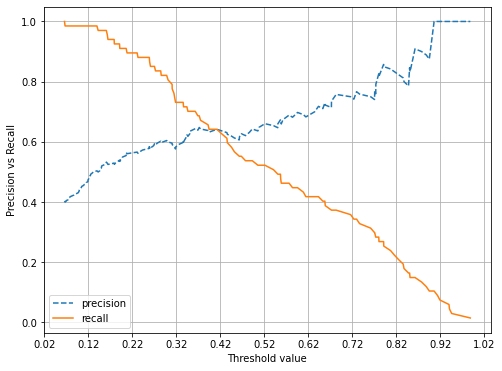

In [51]:
# 피처 데이터세트 X, 레이블 데이터세트 y
y = diabetes_data['Outcome']

X = diabetes_data.drop(columns=['Outcome'])

# 학습 데이터 세트와 테스트 데이터 세트로 분리
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.25  , random_state=42 , stratify=y)


# 로지스틱 회귀로 학습,예측 및 평가
lr = LogisticRegression()
lr.fit(X_train , y_train)

# 예측 확률 : roc_auc_score 용 
pred = lr.predict(X_test)
pred_proba = lr.predict_proba(X_test)

# 성능 평가 결과 출력
pred_proba1 = pred_proba[:,1].reshape(-1,1) # 레이블 값이 1일때의 예측 확률을 추출

get_clf_eval(y_test , pred , pred_proba1)

# 정밀도 - 재현율 곡선 시각화
precision_recall_curve_plot(y_test , pred_proba1)

## 재현율 성능에 조금 더 초점을 맞춰 조정

정밀도와 재현율 곡선을 확인 

**각 피처들의 값 분포 확인**

In [69]:
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


- Glucose(포도당) 피처의 히스토그램

(array([  5.,   0.,   4.,  32., 156., 211., 163.,  95.,  56.,  46.]),
 array([  0. ,  19.9,  39.8,  59.7,  79.6,  99.5, 119.4, 139.3, 159.2,
        179.1, 199. ]),
 <BarContainer object of 10 artists>)

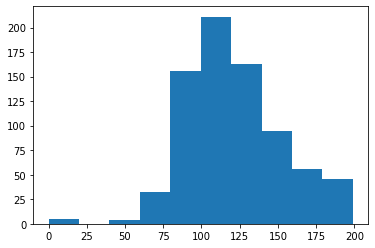

In [70]:
plt.hist(diabetes_data['Glucose'], bins=10)

**0값이 있는 피처들에서 0값의 데이터 건수와 퍼센트 계산**

In [71]:
# 0값을 검사할 피처명 리스트 객체 설정
zero_features = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

In [72]:
# 전체 데이터 건수
diabetes_data['Glucose'].count()

768

In [73]:

diabetes_data[diabetes_data['Glucose']==0]['Glucose']

75     0
182    0
342    0
349    0
502    0
Name: Glucose, dtype: int64

In [116]:
# 피처별로 반복 하면서 데이터 값이 0 인 데이터 건수 추출하고, 퍼센트 계산

for feature in zero_features:
    zcount = diabetes_data[diabetes_data[feature]==0][feature].count()
    print(f'{feature} : {zcount}')

Glucose : 0
BloodPressure : 0
SkinThickness : 0
Insulin : 0
BMI : 0


**0값을 평균값으로 대체**

In [117]:
mean_zero_features = diabetes_data[zero_features].mean()
mean_zero_features

Glucose          121.681605
BloodPressure     72.254807
SkinThickness     26.606479
Insulin          118.660163
BMI               32.450805
dtype: float64

In [118]:
diabetes_data[zero_features] = diabetes_data[zero_features].replace(0, mean_zero_features)

# 리스트를 값에 넣으면 각각의 값을 실행하여 반환

In [119]:
# for feature in zero_features:
#     df[feature].replace(0, df[df[feature]!=0][feature].mean(), inplace=True)


- 0값 검사

In [120]:
for feature in zero_features:
    zcount = diabetes_data[diabetes_data[feature]==0][feature].count()
    print(f'{feature} : {zcount}')

Glucose : 0
BloodPressure : 0
SkinThickness : 0
Insulin : 0
BMI : 0


**StandardScaler 클래스를 이용해 스케일링 적용 학습/예측**

In [121]:
# 피처, 레이블 데이터 세트 지정
X = diabetes_data.iloc[:, :-1]
y = diabetes_data.iloc[:, -1]

# 표준화 스케일링
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# 학습/테스트 데이터 세트로 분리
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state=156, stratify=y)


# 로지스틱 회귀로 학습,예측 및 평가
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)


# 예측 확률 : roc_auc_score 용 
pred_proba1 = lr_clf.predict_proba(X_test)[:, 1]


# 성능 평가 결과 출력
get_clf_eval(y_test, pred, pred_proba1)

오차 행렬
[[90 10]
 [21 33]]
정확도: 0.7987, 정밀도: 0.7674, 재현율: 0.6111,     F1: 0.6804, AUC:0.8433


**분류결정 임계값을 변화시키면서 재현율 성능 측정**
- 임계값을 0.3에서 0.5까지 0.03씩 변화


In [122]:
# 임계값에 따른 평가 수치 출력 함수 get_eval_by_threshold()

def get_eval_by_thresholds(y_test, pred_proba, thresholds):
    for c in thresholds:
        bina = Binarizer(threshold=c)
        bina.fit(pred_proba)
        result = bina.transform(pred_proba)
        print('thresholds: ', c)
        get_clf_eval(y_test, result, pred_proba)

        

In [123]:
from sklearn.preprocessing import Binarizer
thresholds = [0.3 , 0.33 , 0.36 , 0.39 , 0.42 , 0.45 , 0.48 , 0.50]

pred_proba1 = lr_clf.predict_proba(X_test)
get_eval_by_thresholds(y_test , pred_proba1[:,1].reshape(-1,1) , thresholds)

thresholds:  0.3
오차 행렬
[[67 33]
 [11 43]]
정확도: 0.7143, 정밀도: 0.5658, 재현율: 0.7963,     F1: 0.6615, AUC:0.8433
thresholds:  0.33
오차 행렬
[[72 28]
 [12 42]]
정확도: 0.7403, 정밀도: 0.6000, 재현율: 0.7778,     F1: 0.6774, AUC:0.8433
thresholds:  0.36
오차 행렬
[[76 24]
 [15 39]]
정확도: 0.7468, 정밀도: 0.6190, 재현율: 0.7222,     F1: 0.6667, AUC:0.8433
thresholds:  0.39
오차 행렬
[[78 22]
 [16 38]]
정확도: 0.7532, 정밀도: 0.6333, 재현율: 0.7037,     F1: 0.6667, AUC:0.8433
thresholds:  0.42
오차 행렬
[[84 16]
 [18 36]]
정확도: 0.7792, 정밀도: 0.6923, 재현율: 0.6667,     F1: 0.6792, AUC:0.8433
thresholds:  0.45
오차 행렬
[[85 15]
 [18 36]]
정확도: 0.7857, 정밀도: 0.7059, 재현율: 0.6667,     F1: 0.6857, AUC:0.8433
thresholds:  0.48
오차 행렬
[[88 12]
 [19 35]]
정확도: 0.7987, 정밀도: 0.7447, 재현율: 0.6481,     F1: 0.6931, AUC:0.8433
thresholds:  0.5
오차 행렬
[[90 10]
 [21 33]]
정확도: 0.7987, 정밀도: 0.7674, 재현율: 0.6111,     F1: 0.6804, AUC:0.8433


**임계값을 0.48로 설정하여 예측한 성능 지표 확인**